In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
max (19,20)

20

In [7]:
import calendar
calendar.isleap(2000)

True

In [9]:
def f(x):
    return 2 * x + 1
    

In [11]:
f(1)

3

In [13]:
def new_abs_function(x):
    if x < 0:
        abs_value = - x
    else:
        abs_value = x
    return abs_value
        

In [15]:
new_abs_function(-112)

112

In [17]:
def f(x, a= 2, b = 5):
    return a * x + b

In [19]:
f(1)

7

In [21]:
f (1, a = 1, b = 1)

2

In [27]:
f = lambda x: x **3 # if the function is one line, it can be done by lambda

In [25]:
f(2)

8

In [31]:
from scipy.integrate import quad
quad (lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

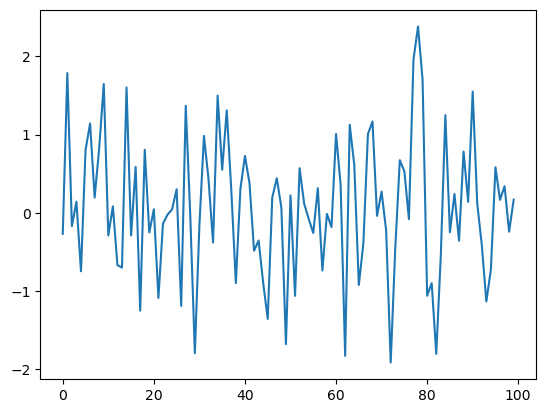

In [35]:
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100)
plt.plot(data)
plt.show()

In [ ]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

In [ ]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

# 4.5. Recursive Function Calls (Advanced)

In [ ]:
# 如何变成动态模型 例如： x_t+1 = 2 * x_t, x_0 = 1

In [38]:
# 第一反应一定是用sequential的方法

In [40]:
def x_loop(t):
    x = 1
    for i in range(t):
        x = 2 * x
    return x

In [42]:
x_loop(10)

1024

In [44]:
# 但也可以作为recursive的方法
def x(t):
    if t == 0:
        return 1
    else:
        return 2 * x(t-1)

In [46]:
x(10)

1024

# 4.6 Exercises

In [351]:
# Exercise 4.1 write a function as factorial
def factorial(x):
    x_factorial = x
    for i in range(x-1):
        x_factorial = x_factorial * (i+1) 
    return x_factorial 

In [91]:
factorial(10)

3628800

In [93]:
10*9*8*7*6*5*4*3*2*1

3628800

In [97]:
# answer
def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

factorial(10)
# 差不多 不错！

3628800

In [349]:
# Exercise 4.2 binomial_rv such that binomial_rv(n, p)
def binomial_rv(n,p):
    s = 0
    for i in range(n):
        e = np.random.uniform()
        if e < p:
            s = s + 1
        else: s = s
    return s 

In [124]:
binomial_rv(1,0.5)

1

In [134]:
binomial_rv(10,0.5)

3

In [132]:
binomial_rv(100,0.5)

46

In [118]:
binomial_rv(1000,0.5)

513

In [120]:
binomial_rv(10000,0.5)

5012

In [140]:
# answer
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count = count + 1    # Or count += 1
    return count

binomial_rv(100, 0.5)
# 确实可以不需要else那条命令， 其他还是不错的， 很棒！

55

In [347]:
# Exercise 4.3 play with coin flip
n = 10      # flip coin 10 times
def coin_game2(n,k):
    count = 0
    for i in range(n):
        U = np.random.uniform()
        if U < 0.5:
            count = count + 1
    if count > k:
        return "pay 1 euro"
    else:
        return "no money!"


In [210]:
coin_game2(10,4)

'pay 1 euro'

In [200]:
def coin_game1(n, k):   # now we need sequentially higher than k times
    count = 0
    sequence = 0
    for i in range (n):
        U = np.random.uniform()
        if U < 0.5:
            sequence = sequence + 1
        else:
            sequence = sequence - 1
        if sequence >= k:
            return "pay 1 euro!"
        else:
            return "no money!"
        

In [212]:
coin_game1(10,4)

'no money!'

In [214]:
# answer
from numpy.random import uniform

def draw(k):  # pays if k consecutive successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + 1 if U < 0.5 else 0
        print(count)    # print counts for clarity
        if count == k:
            payoff = 1

    return payoff

draw(3)

0
0
0
0
0
0
1
0
1
2


0

In [274]:
# print the sequence out and change sequence to 1 or 0 
def coin_game1(n, k):   # now we need sequentially higher than k times
    count = 0
    sequence = 0
    for i in range (n):
        U = np.random.uniform()
        sequence = sequence + 1 if U < 0.5 else 0
        print(sequence)
        
        if sequence == k:
            count = 1
    return "Pay 1 euro" if count > 0 else "No money!"
        
    
        

In [303]:
coin_game1(10 ,3)

1
2
0
1
2
0
1
0
1
2


'No money!'

In [ ]:
# answer
def draw_new(k):  # pays if k successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + ( 1 if U < 0.5 else 0 )
        print(count)
        if count == k:
            payoff = 1

    return payoff

draw_new(3)

In [313]:
# change my answer after see the right one, now it is more clarify
n = 10      # flip coin 10 times
def coin_game2(n,k): # pays if k successes in a sequence
    count = 0
    for i in range(n):
        U = np.random.uniform()
        if U < 0.5:
            count = count + 1
        print (count)
    if count >= k:
        return "pay 1 euro"
    else:
        return "no money!"


In [345]:
coin_game2(10,5)

0
1
2
2
3
4
5
6
7
8


'pay 1 euro'

In [377]:
# Exercise 4.4 Fibonacci numbers
def fib(t):
    if t == 0:
        return 0
    if t == 1:
        return 1
    else:
        return fib(t-1) + fib(t-2)


In [379]:
fib(3)

2

In [381]:
fib(1)

1

In [383]:
fib(0)

0

In [385]:
fib(2)

1

In [387]:
print([fib(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


# 很不错！ 但是愚蠢的第一次写了x(t-1) + x(t-2) 导致一直跑出来结果不对哈哈哈哈 原来fib就是我的x

In [415]:
# Exercise 4.6 Rewrite the function factorial() in from Exercise 1 using recursion.
def factorial(n):
    if n < 1:
        return "wrong number!"
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)


In [417]:
factorial(2)

2

In [419]:
factorial(3)

6

In [421]:
factorial(10)

3628800

In [423]:
# answer
def recursion_factorial(n):
   if n == 1:
       return n
   else:
       return n * recursion_factorial(n-1)


In [425]:
print([recursion_factorial(i) for i in range(1, 10)])

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


In [427]:
# 很好！ 完全一致！ 聪明结束！棒棒！